## 例1：迭代器

“索引式”访问元素：

In [1]:
lst = [1, 1, 2, "a", 3.14]
for i in range(len(lst)):
    print(lst[i])

1
1
2
a
3.14


迭代器式访问：

In [2]:
it = iter(lst)
print(next(it))
print(next(it))
print(next(it))
print(next(it))
print(next(it))
#依照顺序访问
#next（）语句更改了当下环境 一次性

1
1
2
a
3.14


如果继续运行，将出现 StopIteration 错误：

In [3]:
print(next(it))

StopIteration: 

迭代器遍历：

In [4]:
it = iter(lst)
for e in lst:
    print(e)
#对迭代器中每个元素遍历

1
1
2
a
3.14


有些集合无法用索引进行访问：

In [ ]:
st = set(lst)
print(st)
#注意set具有互异性，无序性

以下将出现错误：

In [ ]:
print(st[0])
#不可以取下标

但可以用迭代器：

In [ ]:
it = iter(st)
print(next(it))
print(next(it))
print()

for e in st:
    print(e)
#python for循环既可访问真实数据 也可访问迭代器等

## 例2：计算文件行数

文件可以作为一个迭代器：

In [ ]:
file = open("data/UNv1.0.en-zh.zh", encoding="utf-8")
print(next(file))
print(next(file))
file.close()

遍历文件的每一行：

In [ ]:
file = open("data/UNv1.0.en-zh.zh", encoding="utf-8")
count = 0
#每一行迭代的步骤便是我们所需要的信息（特征）
for line in file:
    count = count + 1
file.close()
print(count)

一种更推荐的语法：

In [ ]:
count = 0
with open("data/UNv1.0.en-zh.zh", encoding="utf-8") as file:
    for line in file:
        count = count + 1
print(count)
#自动file.close()

## 例3：计算序列样本方差

生成数据：

In [5]:
import math
vec = [math.sin(i + math.exp(i)) for i in range(100)]

简单做法：先计算均值，再计算方差：

In [6]:
# 记录样本量
count = 0
# 所有元素之和
vec_sum = 0.0
for e in vec:
    vec_sum = vec_sum + e
    count = count + 1
# 计算均值
mean = vec_sum / count
# 计算方差
vec_var = 0.0
for e in vec:
    vec_var = vec_var + (e - mean) ** 2
vec_var = vec_var / (count - 1)
print(vec_var)

0.4639116338164097


一次遍历方法：$(n-1)S^2=\sum_i (x_i-\bar{x})^2=\sum_i x_i^2-n\bar{x}^2$

In [7]:
#对公式进行变形 使用不同计算方法（算法）-》改善
count = 0
ss = 0.0
s = 0.0
for e in vec:
    ss = ss + e * e
    s = s + e
    count = count + 1
mean = s / count
vec_var = (ss - count * mean * mean) / (count - 1)
print(vec_var)

0.4639116338164096


## 例4：随机抽样

$w=(w_1,\ldots,w_n)$，$v=(v_1,\ldots,v_n)$，每个 $v_i$ 以 $w_i/\sum_j w_j$ 的概率被抽到。

In [9]:
# 生成数据
import string
wvec = list(range(1, 27))
vvec = list(string.ascii_uppercase)

#### 知识点1：同时迭代两个集合

In [13]:
it = zip(wvec, vvec)
#两个容器zip 生成迭代器
print(next(it))
print(next(it))
print()

for w, v in zip(wvec, vvec):
    # print(w, v)
    print(f"w is {w}, v is {v}")

(1, 'A')
(2, 'B')

w is 1, v is A
w is 2, v is B
w is 3, v is C
w is 4, v is D
w is 5, v is E
w is 6, v is F
w is 7, v is G
w is 8, v is H
w is 9, v is I
w is 10, v is J
w is 11, v is K
w is 12, v is L
w is 13, v is M
w is 14, v is N
w is 15, v is O
w is 16, v is P
w is 17, v is Q
w is 18, v is R
w is 19, v is S
w is 20, v is T
w is 21, v is U
w is 22, v is V
w is 23, v is W
w is 24, v is X
w is 25, v is Y
w is 26, v is Z


解法：

In [14]:
# 设置随机数种子
import random
random.seed(123)

D = 0.0
i = 0        # 迭代器中每个元素的索引
loc = 0      # 最终取出的 v 元素的位置（索引）
item = None  # 最终取出的 v 元素
for w, v in zip(wvec, vvec):
    D = D + w
    prob = w / D
    # 以这一概率选择 v
    if random.random() <= prob:
        loc = i
        item = v
    i = i + 1
print(loc)
print(item)

24
Y


#### 知识点2：迭代集合的同时获取索引

In [15]:
it = enumerate(wvec)
#对迭代器进行包装 返回一个新的迭代器 记录第几次循环
print(next(it))
print(next(it))
print()
it = enumerate(zip(wvec, vvec))
print(next(it))
print(next(it))

(0, 1)
(1, 2)

(0, (1, 'A'))
(1, (2, 'B'))


注意此处迭代元素的写法：

In [16]:
for i, (w, v) in enumerate(zip(wvec, vvec)):
    print(f"i is {i}, w is {w}, v is {v}")
    #同时有了三项信息

i is 0, w is 1, v is A
i is 1, w is 2, v is B
i is 2, w is 3, v is C
i is 3, w is 4, v is D
i is 4, w is 5, v is E
i is 5, w is 6, v is F
i is 6, w is 7, v is G
i is 7, w is 8, v is H
i is 8, w is 9, v is I
i is 9, w is 10, v is J
i is 10, w is 11, v is K
i is 11, w is 12, v is L
i is 12, w is 13, v is M
i is 13, w is 14, v is N
i is 14, w is 15, v is O
i is 15, w is 16, v is P
i is 16, w is 17, v is Q
i is 17, w is 18, v is R
i is 18, w is 19, v is S
i is 19, w is 20, v is T
i is 20, w is 21, v is U
i is 21, w is 22, v is V
i is 22, w is 23, v is W
i is 23, w is 24, v is X
i is 24, w is 25, v is Y
i is 25, w is 26, v is Z


改写之前的方法，省去 `i` 的手动更新：

In [17]:
def random_select(wvec, vvec):
    D = 0.0
    loc = 0  # 最终取出的 v 元素的位置（索引）
    item = None  # 最终取出的 v 元素
    for i, (w, v) in enumerate(zip(wvec, vvec)):
        D = D + w
        prob = w / D
        # 以这一概率选择 v
        if random.random() <= prob:
            loc = i
            item = v
    return loc, item

测试抽样概率：

In [18]:
import collections
random.seed(123)
res = [random_select(wvec, vvec)[1] for i in range(10000)]
# 计算频率
elements_count = collections.Counter(res)
for key, value in elements_count.items():
    print(f"{key}: {value}")
#通过模拟进行验证

Y: 744
V: 618
L: 351
Q: 506
X: 679
E: 123
Z: 731
R: 495
U: 569
W: 637
S: 551
O: 428
C: 70
M: 403
N: 433
K: 298
T: 533
I: 276
P: 445
J: 327
D: 120
F: 182
G: 182
H: 220
B: 56
A: 23


按 key 排序：

In [19]:
freq = list(elements_count.items())
freq.sort()
print(freq)

[('A', 23), ('B', 56), ('C', 70), ('D', 120), ('E', 123), ('F', 182), ('G', 182), ('H', 220), ('I', 276), ('J', 327), ('K', 298), ('L', 351), ('M', 403), ('N', 433), ('O', 428), ('P', 445), ('Q', 506), ('R', 495), ('S', 551), ('T', 533), ('U', 569), ('V', 618), ('W', 637), ('X', 679), ('Y', 744), ('Z', 731)]


作图：

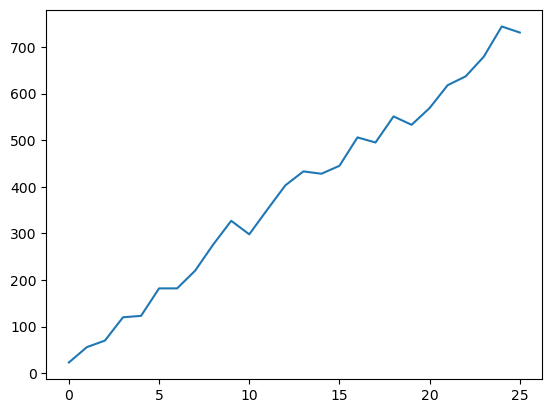

In [20]:
import matplotlib.pyplot as plt
freqs = [v for k, v in freq]
plt.plot(freqs)
plt.show()

## 例5：Reduce
归约 定义函数f（x,y)-》z 例如(((x1,x2),x3),x4)
可以作用到迭代器进行运算

In [ ]:
def add(x ,y):
    return x + y

import functools
x = [1, 2, 3, 4, 5]
it = iter(x)
xsum = functools.reduce(add, it)
print(xsum)
#通过归约 每次内存占用1个元素 将大量数据进行压缩

`reduce` 的第三个参数可以设定规约的初值：

In [ ]:
def mult(x, y):
    return x * y

it = iter(x)
xprod = functools.reduce(mult, it, 1)
print(xprod)

## 例6：Filter


`it` 是原始的迭代器：

In [ ]:
x = list(range(10))
it = iter(x)
print(next(it))  # 0
print(next(it))  # 1
print(next(it))  # 2

`it_filtered` 是“过滤”后的迭代器：

In [ ]:
def is_even(x):
    return x % 2 == 0

it = iter(x)
it_filtered = filter(is_even, it)
#filter（用来过滤的函数，原迭代器）-》新迭代器
#定义运算，但并未运行
print(next(it_filtered))  # 0
print(next(it_filtered))  # 2
print(next(it_filtered))  # 4

## 例7：Map

`it` 是原始的迭代器：

In [ ]:
x = list(range(10))
it = iter(x)
print(next(it))  # 0
print(next(it))  # 1
print(next(it))  # 2

`it_mapped` 是变换后的迭代器：

In [ ]:
def square(x):
    return x * x

it = iter(x)
it_mapped = map(square, it)
#map的输入和输出甚至可以不是一个类型（重要！）对于多特征信息的提取很方便
print(next(it_mapped))  # 0
print(next(it_mapped))  # 1
print(next(it_mapped))  # 4

## 例8：islice

`it` 是原始的迭代器，`it_n` 是长度截断的迭代器：

In [ ]:
import itertools
x = list(range(100))
it = iter(x)
it_n = itertools.islice(it, 5)
#类似于pyspark中的take()
for e in it_n:
    print(e)

## 例9：组合使用，Lambda 表达式

In [ ]:
import itertools
it = iter(range(10000))
it_new = filter(lambda x: x % 2 == 0, it)
it_new = map(lambda x: x * x, it_new)
it_new = itertools.islice(it_new, 10)
print(list(it_new))

## 练习

使用 Map/Reduce 等函数式编程工具计算向量的均值，规定只能使用迭代器**一次**，**不能使用 for 循环**，且不知道向量的长度。

In [ ]:
import math
vec = [math.sin(i + math.exp(i)) for i in range(100)]
it = iter(vec)

同样的要求，计算样本方差？